<a href="https://colab.research.google.com/github/ShivaniH2020/Repository/blob/main/Assignment3_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
print("https://github.com/ShivaniH2020/Repository")

https://github.com/ShivaniH2020/Repository


In [94]:
print("Roll Number: 20MCI0001")

Roll Number: 20MCI0001


In [95]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [96]:
# Load data set
dataset = cifar10.load_data()
(x_train, y_train), (x_test, y_test)=dataset;

In [97]:
#Display number of images in traing and testing dataset and image size
image_count = len(dataset[0][1])+len(dataset[1][1])
print("Total images in dataset:")
print(image_count)
print("\n")
# Display number of classes
y_trainf, y_testf = y_train.flatten(), y_test.flatten()
K = len(set(y_trainf))
print("number of classes:", K)
print("\n")
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("\n")
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)


Total images in dataset:
60000


number of classes: 10


Shape of training data:
(50000, 32, 32, 3)
(50000, 1)


Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [98]:
# Normalize image data (pixel values from 0 to 255) to the 0-to-1 range 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [99]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

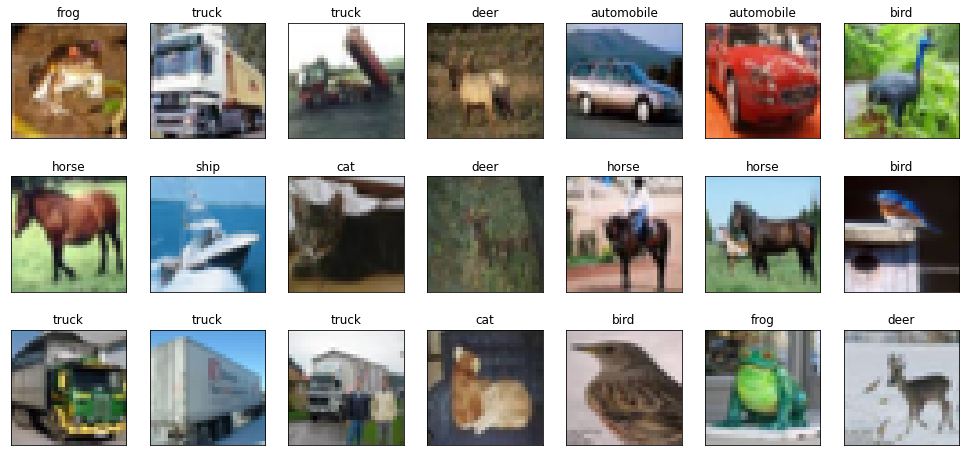

In [100]:
#Display Sample input and output images
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(cifar_classes[y_train[index][0]])
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [103]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_27 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_27 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_28 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_28 (Activation)   (None, 4, 4, 256)        

In [104]:
#Defining the parameters
batch_size= 100
epochs=100
learn_rate=.001


In [105]:
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [106]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [108]:
#Training the model
AlexNet.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 1.7703 - accuracy: 0.3559 - val_loss: 2.7140 - val_accuracy: 0.2509
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3866 - accuracy: 0.5118 - val_loss: 1.5716 - val_accuracy: 0.4699
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2279 - accuracy: 0.5697 - val_loss: 1.8504 - val_accuracy: 0.3978
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1021 - accuracy: 0.6215 - val_loss: 1.1489 - val_accuracy: 0.5930
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9955 - accuracy: 0.6609 - val_loss: 1.5549 - val_accuracy: 0.4851
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8978 - accuracy: 0.6898 - val_loss: 1.2956 - val_accuracy: 0.5534
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8052 - accuracy: 0.7257 - val_loss: 1.2779 -

In [110]:
#Display filter coefficients
AlexNet.layers[0].get_weights()[1]

array([ 1.94e-03,  2.12e-03,  7.41e-04,  1.10e-04,  2.90e-03, -6.37e-03,
        5.32e-03, -8.16e-04, -2.55e-03,  2.94e-03, -1.28e-03, -6.34e-03,
       -2.31e-03, -6.05e-03,  1.29e-02,  4.28e-03,  3.53e-03, -1.99e-03,
        1.34e-02,  1.64e-03,  1.24e-03, -3.54e-03,  7.63e-03,  5.45e-03,
       -3.48e-03,  1.58e-03, -1.95e-03, -3.03e-04,  3.55e-03,  1.06e-03,
        3.33e-03, -1.34e-03, -2.15e-03, -4.24e-04, -5.12e-03, -8.88e-04,
       -1.33e-02,  1.28e-02, -6.16e-04,  2.11e-03, -5.22e-03, -2.48e-03,
        1.29e-03,  4.32e-04,  6.13e-03, -9.39e-04,  4.27e-03,  3.35e-03,
        6.75e-04, -3.23e-03,  7.48e-03,  1.77e-03, -3.95e-03,  1.63e-03,
       -4.31e-03, -1.13e-03,  1.51e-03,  6.05e-03,  6.35e-03, -2.62e-04,
        1.30e-03, -3.07e-03,  6.38e-03,  1.21e-03,  2.60e-04, -4.05e-03,
       -6.05e-03, -3.84e-04, -6.68e-03,  8.72e-03,  7.09e-03, -2.14e-03,
       -1.75e-03, -3.32e-03,  4.22e-03,  2.29e-03, -9.40e-03, -1.33e-02,
       -3.73e-05, -1.61e-03, -5.81e-03, -6.61e-03, 

In [111]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


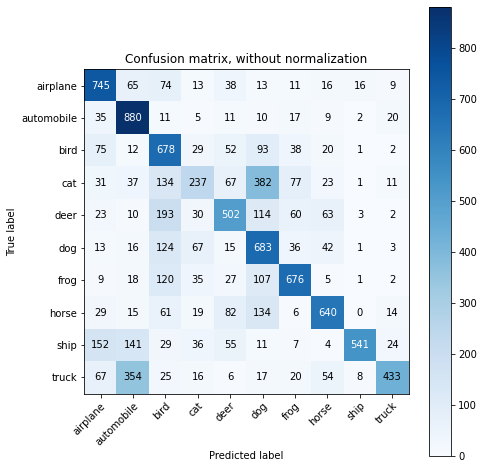

In [112]:
#Making prediction
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')